# Inaugural Project

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject as model
hsm = model.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve this model, we started by defining the given values for both alpha and sigma. After that, we created two arrays that can store the values for HF and HM.

Next, we created a for loop that would loop through the alpha values and, for each alpha value, run through all the sigma values. This allowed us to obtain all the different combinations of alpha and sigma values.

Within the for loop, we used the solve_discrete model which was given, and from this, we calculated the values for HF and HM and stored them in the empty arrays.

Finally, we plotted HF/HM against the sigma values.

In [123]:
import numpy as np
from tabulate import tabulate

alpha_vals = np.array([0.25, 0.5, 0.75])
sigma_vals = np.array([0.5, 1.0, 1.5])

HF_vals = np.zeros((len(alpha_vals), len(sigma_vals)))
HM_vals = np.zeros((len(alpha_vals), len(sigma_vals)))

for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        # Solve model for each combination of alpha and sigma
        hsm.par.alpha = alpha
        hsm.par.sigma = sigma
        opt = hsm.solve_discrete()
        HF_vals[i, j] = opt.HF
        HM_vals[i, j] = opt.HM

table = []
header_sigma = [""] + ["Sigma = 0.5"] + ["Sigma = 1.0"] + ["Sigma = 1.5"]

for i, alpha in enumerate(alpha_vals):
    row = [f"Alpha = {alpha}"] + [f"{HF_vals[i, j] / HM_vals[i, j]:.2f}" for j in range(len(sigma_vals))]
    table.append(row)

print(tabulate(table, headers=header_sigma, tablefmt="grid"))

/Users/christopher/projects-2023-2x-chris-og-ras-1/inauguralproject/inauguralproject.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


+--------------+---------------+---------------+---------------+
|              |   Sigma = 0.5 |   Sigma = 1.0 |   Sigma = 1.5 |
+==============+===============+===============+===============+
| Alpha = 0.25 |          0.55 |          0.31 |          0.21 |
+--------------+---------------+---------------+---------------+
| Alpha = 0.5  |          1    |          1    |          1    |
+--------------+---------------+---------------+---------------+
| Alpha = 0.75 |          1.83 |          3.25 |          4.67 |
+--------------+---------------+---------------+---------------+


# Question 2

When creating a discrete model, we began by developing the code to solve_wF_vec. In this case, when the model needs to be solved, it references another code, depending on whether discrete is true or false. 

The resulting outputs from this code are then stored and used to generate the code below, which calculates the logarithm of returns and plots them accordingly.

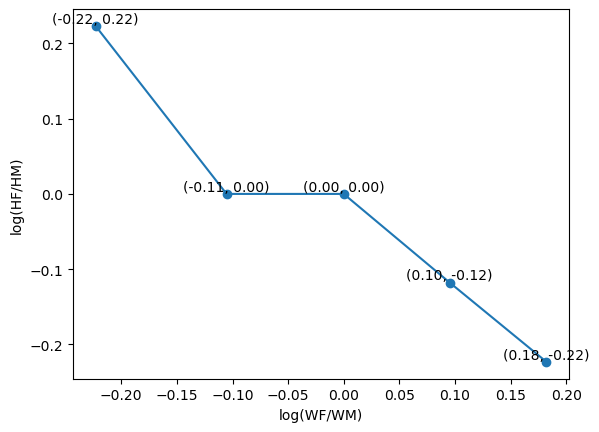

In [124]:
# Instantiate the model
Mo = model.HouseholdSpecializationModelClass()

# Initialize lists to store the logarithmic values
wage_log = []
house_prod_log = []

# Iterate over the values in Mo.par.wF_vec
for wF in Mo.par.wF_vec:
    # Set the female wage
    Mo.par.wF = wF
    
    # Solve the model and obtain the optimization results
    Optimize = Mo.solve_discrete()
    
    # Calculate the logarithmic values
    wage_log.append(np.log(Mo.par.wF / Mo.par.wM))
    house_prod_log.append(np.log(Optimize.HF / Optimize.HM))

# Plot the data points
plt.plot(wage_log, house_prod_log, '-o')

# Set axis labels
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')

# Add labels to the data points
for x, y in zip(wage_log, house_prod_log):
    plt.text(x, y, f'({x:.2f}, {y:.2f})', ha='center', va='bottom')

# Show the plot
plt.show()


# Question 3

We begin by defining the values for wF. Subsequently, a for loop iterates through each value of wF. Within this loop, the solve function from hsm is used to define an objective function to minimize, along with providing initial guesses for the solver. After solving the optimization problem, the optimal choices are saved. Once all iterations of the loop have completed and the optimal values have been saved, a plot can be generated, as demonstrated below.

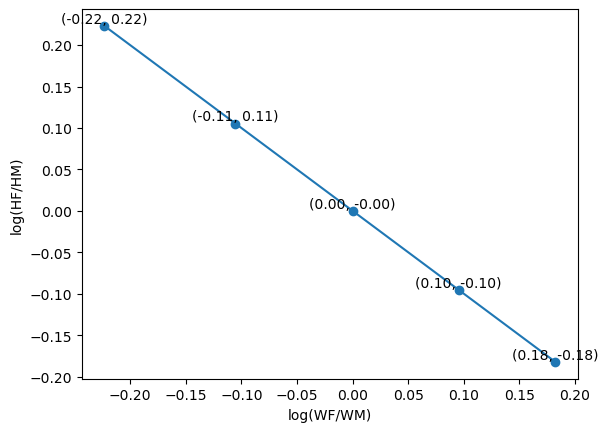

In [125]:
# Instantiate the model
Mo = model.HouseholdSpecializationModelClass()

# Initialize lists to store the logarithmic values
wage_log_continous = []
house_prod_log_continous = []

# Iterate over the values in Mo.par.wF_vec
for wF in Mo.par.wF_vec:
    # Set the female wage
    Mo.par.wF = wF
    
    # Solve the model and obtain the optimization results
    Optimize = Mo.solve()
    
    # Calculate the logarithmic values
    wage_log_continous.append(np.log(Mo.par.wF/Mo.par.wM))
    house_prod_log_continous.append(np.log(Optimize.HF/Optimize.HM))

# Plot the data points
plt.plot(wage_log_continous, house_prod_log_continous, '-o')

# Set axis labels
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')

# Add labels to the data points
for x, y in zip(wage_log_continous, house_prod_log_continous):
    plt.text(x, y, f'({x:.2f}, {y:.2f})', ha='center', va='bottom')

# Show the plot
plt.show()

# Question 4

First, several variables are defined including regression coefficients (beta0, beta1), weights (wM, wF), and dependent variable (log_HFHM). Then an objective function objective(x) is defined that takes two inputs, alpha and sigma, and returns the sum of squared residuals obtained from a linear regression model with coefficients beta0, beta1, and alpha, and normally distributed error term with standard deviation sigma.

Next, an initial guess for the values of alpha and sigma is set (x0). The minimize function is called with objective function, the initial guess (x0), and the optimization method (method='Powell'). The Powell method does not require the gradient of the objective function to be calculated and can handle nonlinear functions.

Finally, the optimization results are printed, including the optimized values for alpha and sigma (result.x[0] and result.x[1], respectively), the function value at the minimum (result.fun), whether the optimization succeeded (result.success), and the optimization message (result.message).

In [126]:
# Running the 'estimate' def in the inauguralproject.py
hsm.estimate(do_print=True)
hsm.par.alpha = hsm.sol.alpha
hsm.par.sigma = hsm.sol.sigma

/Users/christopher/projects-2023-2x-chris-og-ras-1/inauguralproject/inauguralproject.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/christopher/projects-2023-2x-chris-og-ras-1/inauguralproject/inauguralproject.py:62: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Optimization results:
Alpha: 0.98
Sigma: 0.10
Residual value: 0.00
Success: True
Message: Optimization terminated successfully.


In [129]:
print(wage_log_continous)

[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


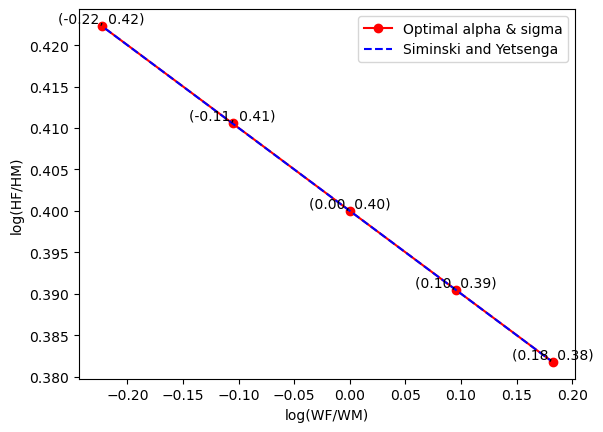

In [152]:
# Initialize lists to store the logarithmic values
wage_log_continous = []
house_prod_log_continous = []

# Iterate over the values in Mo.par.wF_vec
for wF in hsm.par.wF_vec:
    # Set the female wage
    hsm.par.wF = wF
    
    # Solve the model and obtain the optimization results
    Optimize = hsm.solve()
    
    # Calculate the logarithmic values
    wage_log_continous.append(np.log(hsm.par.wF/hsm.par.wM))
    house_prod_log_continous.append(np.log(Optimize.HF/Optimize.HM))

x = np.linspace(-0.22,0.18,2)
y = hsm.par.beta0_target + hsm.par.beta1_target*x

# Plot the data points
plt.plot(wage_log_continous, house_prod_log_continous, '-o', label='Optimal alpha & sigma', color='r')
plt.plot(x,y,'--', label='Siminski and Yetsenga', color='blue')

plt.legend()

# Set axis labels
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')

# Add labels to the data points
for x, y in zip(wage_log_continous, house_prod_log_continous):
    plt.text(x, y, f'({x:.2f}, {y:.2f})', ha='center', va='bottom')

# Show the plot
plt.show()

The regression equation log HF/HM = β0 + β1 log wF/wM estimates the association between the logarithm of the time use of wives (HF) and husbands (HM) and the logarithm of their relative wages (wF/wM), holding other factors constant.

The coefficient β0 represents the average difference in log time use between wives and husbands when their relative wages are equal (i.e., wF/wM = 1). In this case, the interpretation of β0 ≈ 0.4 is that wives, on average, spend about 1.5 times more time on unpaid work (such as housework and care-giving) than husbands.

The coefficient β1 represents the change in the log time use ratio between wives and husbands for a one unit increase in their relative wages. The interpretation of β1 ≈ -0.1 is that a 10% increase in wives' relative wages is associated with a 1% decrease in the time use ratio of wives to husbands. This suggests that as women's earning potential increases, they may shift their time use away from unpaid work and toward market work or leisure activities.

In terms of the results of choosing α and σ that minimize the square differences between β0 and ˆβ0, and between β1 and ˆβ1, this would provide the best fit between the original regression equation and the model estimated on data with fixed relative wages. The economic interpretation of the results would depend on the specific values of α and σ chosen and how well they fit the data. If the model fits the data well, it could provide additional support for the association between relative wages and time use found in the original regression equation.

# Question 5

In the extended code, the objective function includes an additional parameter gamma, which is used to calculate sigma as gamma times wF. This means that sigma can vary across different levels of wF, which allows for a more flexible relationship between sigma and wF. The extension aims to better capture the relationship between log HF/HM and wF while accounting for heteroscedasticity in the error term.

In [128]:
import numpy as np
from scipy.optimize import minimize

# Define the regression coefficients and data
beta0 = 0.4
beta1 = -0.1
wM = 1.0
wF = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
log_HFHM = np.array([0.1, -0.2, -0.3, -0.4, -0.6])

# Define the function to minimize
def objective(x):
    alpha, gamma = x
    sigma = gamma * wF
    residuals = log_HFHM - (beta0 + alpha * np.log(wF/wM) + sigma * np.random.randn(len(log_HFHM)))
    return np.sum(residuals**2)

# Set initial values for alpha and sigma
x0 = np.array([1.0, 1.0])
bnds = ((0, 1), (0, None))

# Minimize the objective function
result = minimize(objective, x0, method='Powell', bounds=bnds)

# Print the results
print("Optimization results:")
print("=====================")
print(f"Alpha: {result.x[0]:.2f}")
print(f"Sigma: {result.x[1]:.2f}")
print(f"Function value: {result.fun:.2f}")
print(f"Success: {result.success}")
print(f"Message: {result.message}")

Optimization results:
Alpha: 0.76
Sigma: 0.65
Function value: 1.80
Success: True
Message: Optimization terminated successfully.
